In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Correlation
The function `correlation` computes the correlation coefficient between two columns `col1` and `col2` in a dataset `data`. It quantifies the strength and direction of their linear relationship using means, standard deviations, and the covariance of their deviations from the means.

In [19]:
def correlation(data, col1, col2):
    x = data[col1]
    y = data[col2]
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_std = np.std(x)
    y_std = np.std(y)
    n = len(x)
    return np.sum((x - x_mean) * (y - y_mean)) / (n * x_std * y_std)

## Correlation matrix
The function `corr_matrix` computes a correlation matrix for a dataset, where each cell contains the Pearson correlation coefficient between pairs of columns. It iterates through all column pairs, calculating correlations using the `correlation` function, and returns a DataFrame with column and row labels representing column names and the computed correlations.

In [20]:
def corr_matrix(data):
    n = len(data.columns)
    corr = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            corr[i, j] = correlation(data, data.columns[i], data.columns[j])
    return pd.DataFrame(corr, columns=data.columns, index=data.columns)

## Load

In [21]:
iris_df = pd.read_csv('iris.csv').drop('Id', axis=1)
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Consider only the features of the dataset, and compute the correlation matrix.

In [22]:
features = iris_df.columns[:-1]
iris_req_df = iris_df[features]
iris_req_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
corr = corr_matrix(iris_req_df)
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

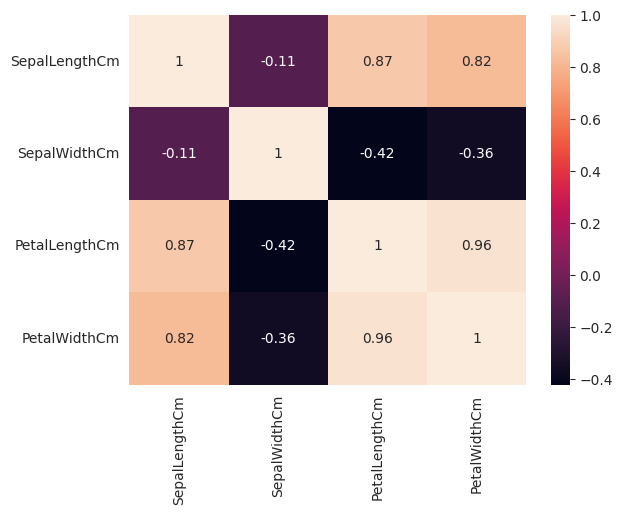

In [24]:
sns.heatmap(corr, annot=True)

## Highly correlated features
This code examines a correlation matrix `corr`, identifying highly correlated pairs (above 0.8) and negatively correlated pairs (below -0.4). It then prints these pairs separately along with their correlation values.

In [25]:
print('Highly correlated features:')
pos, neg = [], []
for i in range(len(corr)):
    for j in range(i+1, len(corr)):
        val = round(corr.iloc[i, j], 2)
        if val > 0.8:
            pos.append(f"{corr.columns[i]} - {corr.columns[j]}: {val}")
        elif val < -0.4:
            neg.append(f"{corr.columns[i]} - {corr.columns[j]}: {val}")
print('\nPositive correlation')
print(*pos, sep='\n')
print('\nNegative correlation')
print(*neg, sep='\n')

Highly correlated features:

Positive correlation
SepalLengthCm - PetalLengthCm: 0.87
SepalLengthCm - PetalWidthCm: 0.82
PetalLengthCm - PetalWidthCm: 0.96

Negative correlation
SepalWidthCm - PetalLengthCm: -0.42
